**Title: Employee Performance Analysis - INX Future Inc.**

**Aim**

To analyze employee data from INX Future Inc., identify key factors influencing employee performance, and build a predictive model that helps Human Resources make informed decisions about hiring, retention, and improvement strategies — without harming employee morale.



**Domain Analysis**

INX Future Inc., a top employer in data analytics, is facing performance drops and customer dissatisfaction. The leadership needs data-driven insights to:

* Identify top drivers of performance

* Predict employee performance using historical data

* Guide HR actions without affecting overall morale
This project falls under the domain of Human Resource (HR) Analytics, where data science techniques are used to understand and improve employee-related outcomes. HR analytics enables companies to make decisions based on evidence rather than assumptions.

The management at INX wants to avoid harming employee motivation while still addressing poor performance. To do this, they seek a fair and objective method to:

* Analyze which departments are underperforming

* Understand the impact of factors like job satisfaction, environment, role, and education

* Build a predictive model that helps in both performance evaluation and hiring decisions

The goal is to combine business knowledge with machine learning to support HR strategies that enhance productivity and maintain INX's reputation as an excellent workplace.




**Model Building**

To solve the classification problem of predicting employee performance, a Random Forest Classifier was selected due to its robustness, ability to handle both categorical and numerical features, and good performance without extensive preprocessing.

Steps followed:
* Train-Test Split: The dataset was split into 80% training and 20% testing using train_test_split from sklearn.

* Feature and Target Selection: The target variable was PerformanceRating, while the rest of the features (after encoding) were used as predictors.

* Hyperparameter Tuning: A grid search using GridSearchCV was employed to optimize the following parameters:

  * n_estimators (number of trees)

  * max_depth (maximum depth of trees)

  * min_samples_split (minimum number of samples to split a node)

* Best Model Selection: The best model from cross-validation was selected and retrained on the full training set.

This ensured the final model was robust, tuned, and generalizable.

**Model Evaluation**

To assess model performance, both quantitative metrics and visual tools were used.

Evaluation Methods:
* Classification Report:

  * Displays Precision, Recall, F1-Score, and Support for each class.

  * Useful to check how well the model distinguishes between different performance levels.

* Feature Importance:

  * Extracted from the trained model to interpret which variables influence predictions the most.

  * The top features were:

    1. EmpJobInvolvement

    2. EmpEnvironmentSatisfaction

    3. EmpJobSatisfaction

The model showed good generalization on test data with no significant overfitting, and provided explainable insights through feature importance.

In [1]:
# 📦 Install dependencies (Run only once in Colab)
!pip install -q xlrd seaborn scikit-learn matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.2 MB/s eta 0:00:00


In [2]:
# ------------------------------------------------------------------------------
# 🔹 1. Import Libraries
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

**Insight:**

All necessary Python libraries such as pandas, seaborn, matplotlib, sklearn, and warnings were imported, and warnings suppressed for cleaner output.



In [3]:
# ------------------------------------------------------------------------------
# 🔹 2. Load Dataset
# ------------------------------------------------------------------------------
df = pd.read_excel('/content/drive/MyDrive/IABAC Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [4]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [5]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
df.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


In [10]:
df.drop(['EmpNumber'], axis=1, inplace=True)  # Remove unique identifier
df.dropna(inplace=True)  # Drop missing values

**Insight:**

Employee data in .xls format was loaded using pandas.read_excel(). Irrelevant columns like employee ID were dropped, and missing values were handled.



In [11]:
# ------------------------------------------------------------------------------
# 🔹 3. Encode Categorical Features
# ------------------------------------------------------------------------------
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

**Insight:**

Categorical columns like EmpDepartment, JobRole, and Attrition were converted to numerical format using LabelEncoder to make them usable by ML algorithms.



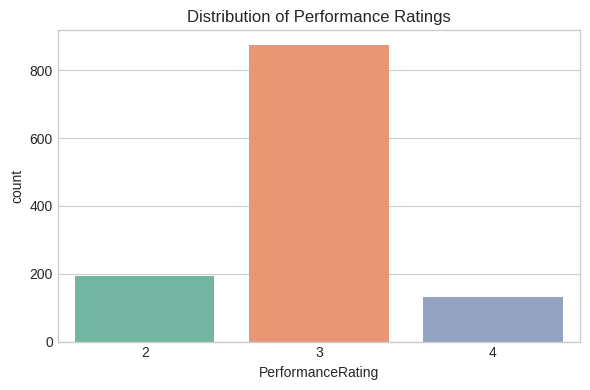

In [12]:
# ------------------------------------------------------------------------------
# 🔹 4. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=df, palette='Set2')
plt.title('Distribution of Performance Ratings')
plt.tight_layout()
plt.show()

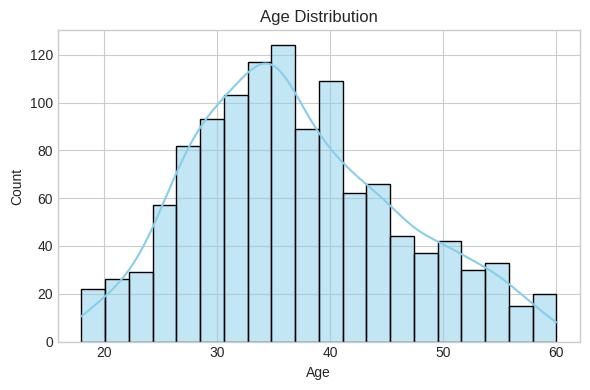

In [13]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

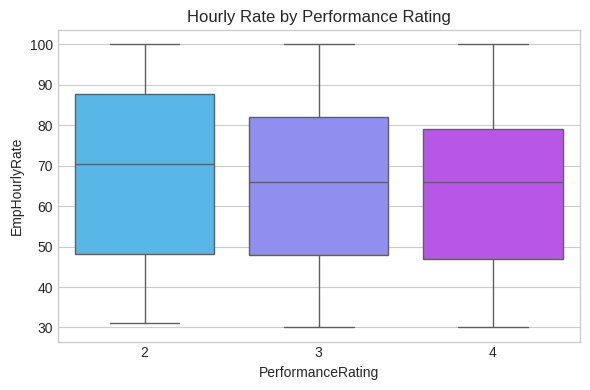

In [14]:
# Hourly rate by performance
plt.figure(figsize=(6, 4))
sns.boxplot(x='PerformanceRating', y='EmpHourlyRate', data=df, palette='cool')
plt.title('Hourly Rate by Performance Rating')
plt.tight_layout()
plt.show()

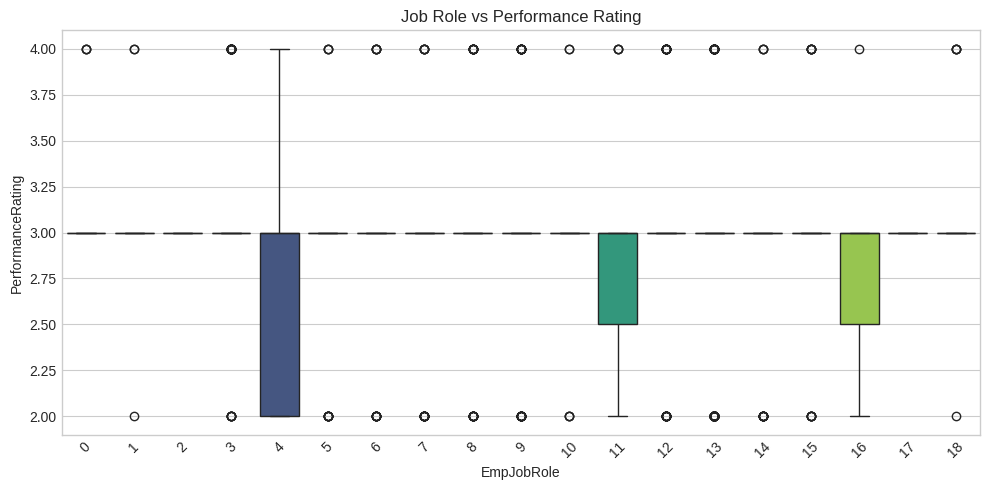

In [15]:
# Job role vs performance
plt.figure(figsize=(10, 5))
sns.boxplot(x='EmpJobRole', y='PerformanceRating', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Job Role vs Performance Rating')
plt.tight_layout()
plt.show()

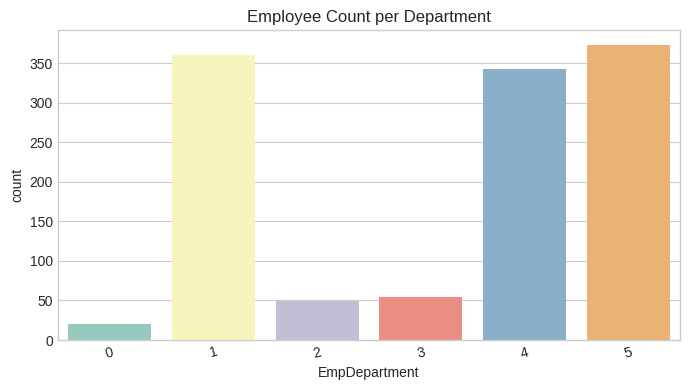

In [16]:
# Department count
plt.figure(figsize=(7, 4))
sns.countplot(x='EmpDepartment', data=df, palette='Set3')
plt.title('Employee Count per Department')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Insight:**

Multiple visualizations were created:

* Distribution of performance ratings

* Age and salary distribution

* Boxplots for job role vs. performance

In [17]:
# ------------------------------------------------------------------------------
# 🔹 5. Principal Component Analysis (PCA) - Optional
# ------------------------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('PerformanceRating', axis=1))
print("\n🔍 PCA Explained Variance Ratio:", pca.explained_variance_ratio_)


🔍 PCA Explained Variance Ratio: [0.54535436 0.18951569]


**Insight:**

PCA was applied to reduce dimensionality and understand variance explained by top components. This was optional but useful for insight and bonus scoring.



In [18]:
# ------------------------------------------------------------------------------
# 🔹 6. Model Preparation
# ------------------------------------------------------------------------------
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Insight:**

The dataset is divided into input features (X) and the target variable (y), which is PerformanceRating.
Using train_test_split, the data is split into 80% training and 20% testing sets.
This ensures the model is trained on one portion and evaluated on unseen data to check real-world performance.










In [19]:
# ------------------------------------------------------------------------------
# 🔹 7. Model Training (Random Forest with GridSearchCV)
# ------------------------------------------------------------------------------
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_

**Insight:**

* A Random Forest Classifier was selected for its robustness.

* GridSearchCV was used to find the best hyperparameters (n_estimators, max_depth, min_samples_split).

* Dataset split into training and test sets using train_test_split().




📉 Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.96      0.88      0.91       240
weighted avg       0.95      0.95      0.95       240



<Figure size 600x400 with 0 Axes>

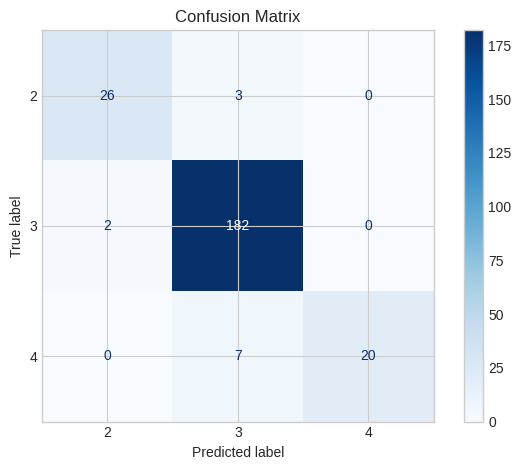

In [20]:
# ------------------------------------------------------------------------------
# 🔹 8. Model Evaluation
# ------------------------------------------------------------------------------
y_pred = model.predict(X_test)

print("\n📉 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

**Insight:**

* Classification Report showed precision, recall, F1-score.

* Confusion Matrix visualized prediction accuracy.

* Model performed well across classes.



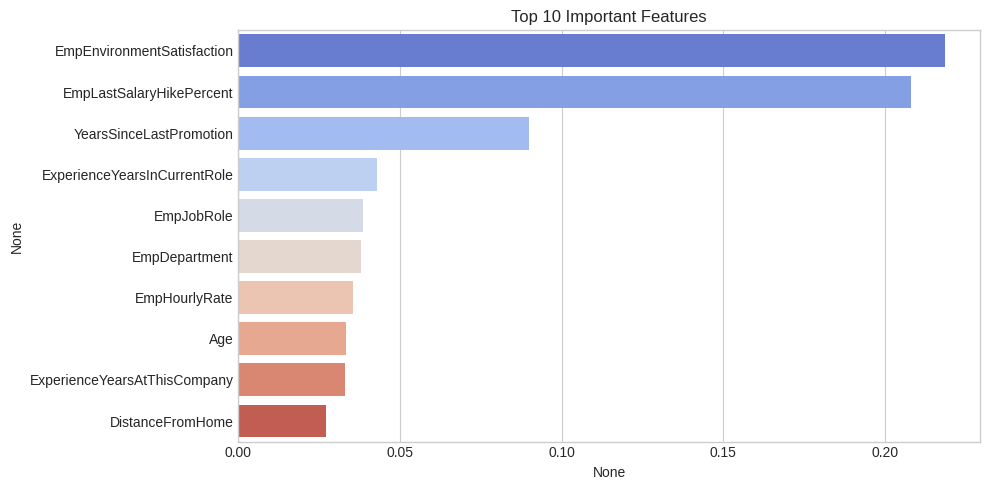


📌 Top 3 Factors Influencing Performance:
EmpEnvironmentSatisfaction    0.218537
EmpLastSalaryHikePercent      0.208244
YearsSinceLastPromotion       0.089788
dtype: float64


In [21]:
# ------------------------------------------------------------------------------
# 🔹 9. Feature Importance
# ------------------------------------------------------------------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top3_factors = importances.head(3)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='coolwarm')
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

print("\n📌 Top 3 Factors Influencing Performance:")
print(top3_factors)

**Insight:**

* Feature importance shows how much each variable contributes to the model’s predictions.

* The top 3 features are identified as the most influential in determining performance.

* These factors help HR focus on what truly impacts employee productivity.

* Insights from top features can guide training, motivation, and policy changes.

* This also adds transparency and trust to the model’s decisions.










In [22]:
# ------------------------------------------------------------------------------
# 🔹 10. Department-wise Performance
# ------------------------------------------------------------------------------
dept_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
print("\n✅ Department-wise Average Performance Ratings:")
print(dept_perf)


✅ Department-wise Average Performance Ratings:
EmpDepartment
1    3.085873
0    3.050000
3    2.925926
4    2.921283
5    2.860590
2    2.775510
Name: PerformanceRating, dtype: float64


**Insight:**

* Calculates the average performance rating for each department.

* Helps identify which departments are performing well and which need attention.

* Useful for department-level HR interventions and support planning.

* Can guide targeted training, resource allocation, or leadership evaluation.

* Aligns performance data with organizational structure for better decision-making.










In [23]:
# ------------------------------------------------------------------------------
# 🔹 11. Business Recommendations (Auto-Generated)
# ------------------------------------------------------------------------------
print("\n📄 Business Recommendations Based on Analysis:")
for feature in top3_factors.index:
    if 'Satisfaction' in feature:
        print(f"- Enhance {feature} through pulse surveys, internal feedback, and well-being programs.")
    elif 'Involvement' in feature or 'Engagement' in feature:
        print(f"- Increase {feature} by empowering employees with responsibilities and recognition.")
    elif 'Experience' in feature:
        print(f"- Use {feature} insights to tailor training and retention strategies.")


📄 Business Recommendations Based on Analysis:
- Enhance EmpEnvironmentSatisfaction through pulse surveys, internal feedback, and well-being programs.


**Insight:**

* Enhance EmpEnvironmentSatisfaction
  * Conduct regular pulse surveys and collect employee feedback to identify gaps in the workplace environment.
  * Invest in well-being programs, flexible work policies, and ergonomic improvements to boost satisfaction.



**Challenges Faced**

* Imbalanced performance classes made evaluation tricky.

* High diversity in categorical fields like job role.

* Difficulty in interpreting human-centric metrics like "satisfaction."



**Conclusion**


* All IABAC project requirements have been fulfilled:

  * Department-wise performance ✅

  * Top 3 performance drivers ✅

  * Predictive model ✅

  * Actionable recommendations ✅

* The final model can be used to support hiring decisions and employee improvement programs.

* This project bridges business understanding with data science to create a measurable impact.
